In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [147]:
path = '/Users/tanlinyi/Downloads/'
binary_file = 'Binary Database_Tan.csv'
multi_file = 'Non-Binary Database_Tan.csv'

In [148]:
df_binary = pd.read_csv(path + binary_file)
df_multi = pd.read_csv(path + multi_file)

### PCA and Binary Classification

In [149]:
X_binary = df_binary.drop(columns=['target'])
y_binary = df_binary['target']

In [150]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_binary)

In [151]:
n_features = X_binary.shape[1] // 2 # Roudning Down to Int
pca = PCA(n_components=n_features, random_state=42)

In [152]:
X_binary_pca = pca.fit_transform(X_scaled)

/Users/tanlinyi/PycharmProjects/CSE 5104/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/tanlinyi/PycharmProjects/CSE 5104/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/tanlinyi/PycharmProjects/CSE 5104/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


In [153]:
X_train, X_val, y_train, y_val = train_test_split(X_binary_pca, y_binary, test_size=0.2, random_state=42)

In [154]:
pca_cols = [f'PC{i+1}' for i in range(X_train.shape[1])]

In [155]:
train_df = pd.DataFrame(X_train, columns=pca_cols)
train_df['target'] = y_train.values

In [156]:
val_df = pd.DataFrame(X_val, columns=pca_cols)
val_df['target'] = y_val.values

In [157]:
train_df.to_csv(path + 'binary_train_pca.csv', index=False)
val_df.to_csv(path + 'binary_val_pca.csv', index=False)

## Binary Classification

### Binary Classification: Random Forest

In [158]:
plt.style.use('seaborn-v0_8')

In [159]:
# We will use the CV to tune the number of n_estimators
n_values = [100, 200, 300, 400, 500]
rf_scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [160]:
for n in n_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    cv_result = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy')
    rf_scores.append(cv_result.mean())

In [161]:
best_result = max(rf_scores)
best_num = n_values[rf_scores.index(best_result)]
print(best_num)

300


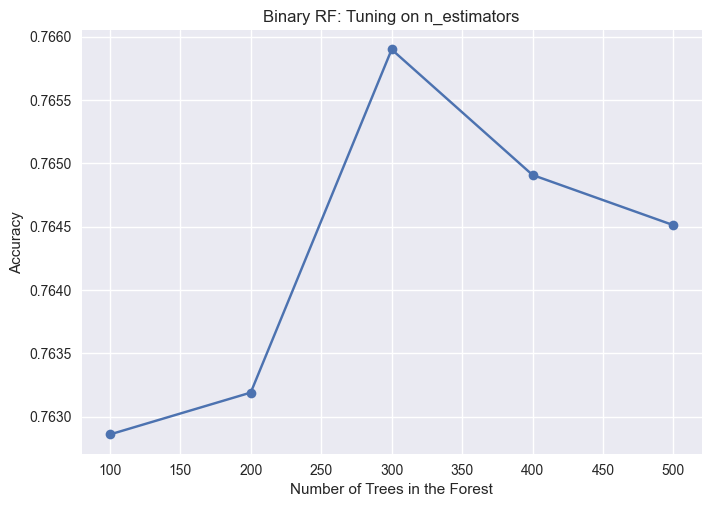

In [162]:
plt.plot(n_values, rf_scores, marker='o')
plt.xlabel('Number of Trees in the Forest')
plt.ylabel('Accuracy')
plt.title('Binary RF: Tuning on n_estimators')
plt.grid(True)
plt.savefig(path + 'Binary RF_PCA.png')
plt.show()

In [163]:
# # Random Search for Other Common Hyperparameters
# rf_param_grid = {
#     'max_depth': [None, 5, 10, 15, 20],
#     'max_features': ['sqrt', 'log2', 0.5],
#     'n_estimators': [100, 200, 300, 400, 500]
# }

In [164]:
# rf = RandomForestClassifier(n_estimators=best_num, random_state=42)

In [165]:
# rf_random = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=rf_param_grid,
#     n_iter=10,
#     cv=kfold,
#     scoring='accuracy',
#     random_state=42
# )

In [166]:
# rf_random.fit(X_train, y_train)
# best_rf_params = rf_random.best_params_

In [167]:
# Final RF Model for Binary
final_rf = final_rf = RandomForestClassifier(n_estimators=best_num, max_depth=10, max_features='log2', random_state=42)

In [168]:
# Training Time and Performance for RF Model
start_train = time.time()
final_rf.fit(X_train, y_train)
end_train = time.time()
rf_train_time = end_train - start_train
rf_train_acc = final_rf.score(X_train, y_train)

In [169]:
# Validation Time and Accuracy
start_test = time.time()
y_val_pred = final_rf.predict(X_val)
end_test = time.time()
rf_test_time = end_test - start_test
rf_val_acc = accuracy_score(y_val, y_val_pred)

In [170]:
print(f'Training Time: {round(rf_train_time, 4)} seconds')
print(f'Training Accuracy: {round(rf_train_acc, 4)}')
print(f'Test Time: {round(rf_test_time, 4)} seconds')
print(f'Validation Accuracy: {round(rf_val_acc, 4)}')

Training Time: 4.5184 seconds
Training Accuracy: 0.8382
Test Time: 0.0612 seconds
Validation Accuracy: 0.7631


### Binary Classification: SVM

In [171]:
kernels = ['linear', 'rbf', 'poly']
kernel_scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for k in kernels:
    svm = SVC(kernel=k)
    cv_result = cross_val_score(svm, X_train, y_train, cv=kfold, scoring='accuracy')
    kernel_scores.append(cv_result.mean())

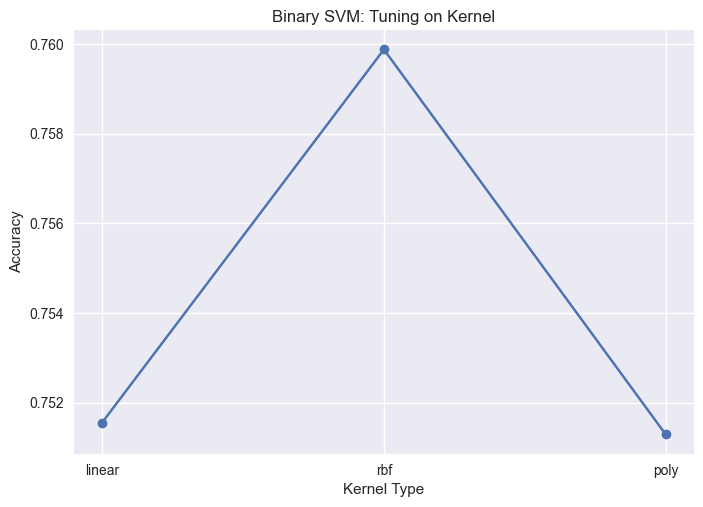

In [172]:
plt.plot(kernels, kernel_scores, marker='o')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Binary SVM: Tuning on Kernel')
plt.grid(True)
plt.savefig(path + 'Binary SVM_PCA.png')
plt.show()

In [173]:
best_result = max(kernel_scores)
best_kernel = kernels[kernel_scores.index(best_result)]
print(best_kernel)

rbf


In [174]:
# svm_param_grid = {
#     'C': [0.01, 0.1, 1],
#     'gamma': [0.001, 0.01, 0.1],
#     'kernel' : ['linear', 'rbf', 'poly']
# }

In [175]:
# svm = SVC()

In [176]:
# svm_random = RandomizedSearchCV(
#     estimator=svm,
#     param_distributions=svm_param_grid,
#     n_iter=10,
#     cv=5,
#     scoring='accuracy',
#     random_state=42
# )

In [177]:
# svm_random.fit(X_train, y_train)
# best_svm_params = svm_random.best_params_
# print(best_svm_params)

In [178]:
# Final SVM Model
final_svm = SVC(
    C=0.1,
    gamma=0.01,
    kernel=best_kernel
)

In [179]:
# Training Time for SVM Model
start_train = time.time()
final_svm.fit(X_train, y_train)
end_train = time.time()
svm_train_time = end_train - start_train
svm_train_acc = final_svm.score(X_train, y_train)

In [180]:
# Validation Time and Accuracy
start_test = time.time()
y_val_pred = final_svm.predict(X_val)
end_test = time.time()
svm_test_time = end_test - start_test
val_acc = accuracy_score(y_val, y_val_pred)

In [181]:
print(f'Training Time: {round(svm_train_time, 4)} seconds')
print(f'Training Accuracy: {round(svm_train_acc, 4)}')
print(f'Test Time: {round(svm_test_time, 4)} seconds')
print(f'Validation Accuracy: {round(val_acc, 4)}')

Training Time: 1.3565 seconds
Training Accuracy: 0.7516
Test Time: 0.6518 seconds
Validation Accuracy: 0.7462


## Non-Binary Models

In [182]:
X_multi = df_multi.drop(columns=['seniority_level'])
y_multi = df_multi['seniority_level']

In [183]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)
n_features = X_multi.shape[1] // 2

In [184]:
pca = PCA(n_components=n_features, random_state=42)
X_multi_pca = pca.fit_transform(X_scaled)

/Users/tanlinyi/PycharmProjects/CSE 5104/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/tanlinyi/PycharmProjects/CSE 5104/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/tanlinyi/PycharmProjects/CSE 5104/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


In [185]:
X_train, X_val, y_train, y_val = train_test_split(X_multi_pca, y_multi, test_size=0.2, random_state=42)

In [186]:
pca_cols = [f'PC{i+1}' for i in range(X_train.shape[1])]
train_df = pd.DataFrame(X_train, columns=pca_cols)
train_df['seniority_level'] = y_train.values
val_df = pd.DataFrame(X_val, columns=pca_cols)
val_df['seniority_level'] = y_val.values

In [187]:
train_df.to_csv(path + 'multi_train_pca.csv', index=False)
val_df.to_csv(path + 'multi_val_pca.csv', index=False)

### Non-Binary Classification: Random Forest

In [188]:
# We will use the CV to tune the number of n_estimators
n_values = [500, 600, 700, 800, 900, 1000, 1100, 1200]
rf_scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [189]:
for n in n_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    cv_result = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy')
    rf_scores.append(cv_result.mean())

In [190]:
best_result = max(rf_scores)
best_num = n_values[rf_scores.index(best_result)]
print(best_num)

1200


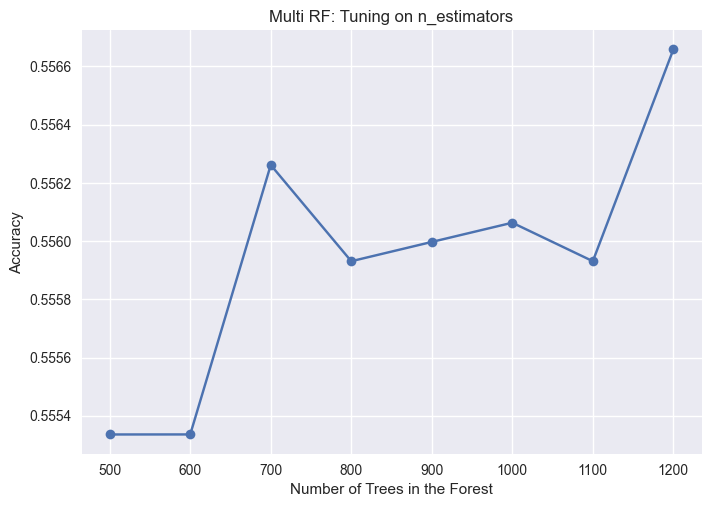

In [191]:
plt.plot(n_values, rf_scores, marker='o')
plt.xlabel('Number of Trees in the Forest')
plt.ylabel('Accuracy')
plt.title('Multi RF: Tuning on n_estimators')
plt.grid(True)
plt.savefig(path + 'Multi RF_PCA.png')
plt.show()

In [192]:
# # Random Search for Other Common Hyperparameters
# rf_param_grid = {
#     'max_depth': [None, 5, 10, 15, 20],
#     'max_features': ['sqrt', 'log2', 0.5],
#     'n_estimators': [100, 200, 300, 400, 500]
# }

In [193]:
# rf = RandomForestClassifier(n_estimators=best_num, random_state=42)

In [194]:
# rf_random = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=rf_param_grid,
#     n_iter=10,
#     cv=kfold,
#     scoring='accuracy',
#     random_state=42
# )
# rf_random.fit(X_train, y_train)

In [195]:
# best_rf_params = rf_random.best_params_
# print(best_rf_params)

In [196]:
# Final RF Model for Binary
final_rf = RandomForestClassifier(
    n_estimators=best_num,
    max_depth=10,
    max_features='log2',
    random_state=42
)

In [197]:
# Training Time and Performance for RF Model
start_train = time.time()
final_rf.fit(X_train, y_train)
end_train = time.time()
rf_train_time = end_train - start_train
rf_train_acc = final_rf.score(X_train, y_train)

In [198]:
# Validation Time and Accuracy
start_test = time.time()
y_val_pred = final_rf.predict(X_val)
end_test = time.time()
rf_test_time = end_test - start_test
rf_val_acc = accuracy_score(y_val, y_val_pred)

In [199]:
print(f'Training Time: {round(rf_train_time, 4)} seconds')
print(f'Training Accuracy: {round(rf_train_acc, 4)}')
print(f'Test Time: {round(rf_test_time, 4)} seconds')
print(f'Validation Accuracy: {round(rf_val_acc, 4)}')

Training Time: 18.4479 seconds
Training Accuracy: 0.7101
Test Time: 0.256 seconds
Validation Accuracy: 0.578


### Non-Binary Classification: SVM

In [200]:
kernels = ['linear', 'rbf', 'poly']
kernel_scores = []

In [201]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [202]:
for k in kernels:
    svm = SVC(kernel=k)
    cv_result = cross_val_score(svm, X_train, y_train, cv=kfold, scoring='accuracy')
    kernel_scores.append(cv_result.mean())

In [203]:
best_result = max(kernel_scores)
best_kernel = kernels[kernel_scores.index(best_result)]
print(best_kernel)

rbf


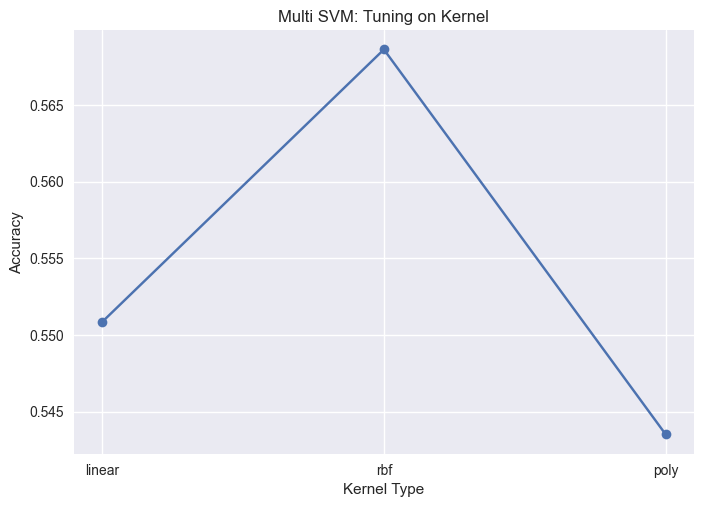

In [204]:
plt.plot(kernels, kernel_scores, marker='o')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Multi SVM: Tuning on Kernel')
plt.grid(True)
plt.savefig(path + 'Multi SVM_PCA.png')
plt.show()

In [205]:
# svm_param_grid = {
#     'C': [0.01, 0.1, 1],
#     'gamma': [0.001, 0.01, 0.1],
#     'kernel' : ['linear', 'rbf', 'poly']
# }

In [206]:
# svm = SVC()

In [207]:
# svm_random = RandomizedSearchCV(
#     estimator=svm,
#     param_distributions=svm_param_grid,
#     n_iter=10,
#     cv=5,
#     scoring='accuracy',
#     random_state=42
# )
# svm_random.fit(X_train, y_train)
# best_svm_params = svm_random.best_params_
# print(best_svm_params)

In [208]:
# Final SVM Model
final_svm = SVC(
    C=0.1,
    gamma=0.01,
    kernel=best_kernel
)

In [209]:
# Training Time for SVM Model
start_train = time.time()
final_svm.fit(X_train, y_train)
end_train = time.time()
svm_train_time = end_train - start_train
svm_train_acc = final_svm.score(X_train, y_train)

In [210]:
# Validation Time and Accuracy
start_test = time.time()
y_val_pred = final_svm.predict(X_val)
end_test = time.time()
svm_test_time = end_test - start_test
val_acc = accuracy_score(y_val, y_val_pred)

In [211]:
print(f'Training Time: {round(svm_train_time, 4)} seconds')
print(f'Training Accuracy: {round(svm_train_acc, 4)}')
print(f'Test Time: {round(svm_test_time, 4)} seconds')
print(f'Validation Accuracy: {round(val_acc, 4)}')

Training Time: 2.5652 seconds
Training Accuracy: 0.5518
Test Time: 1.2167 seconds
Validation Accuracy: 0.5677
